# Darstellung als Ganzzahl


int16


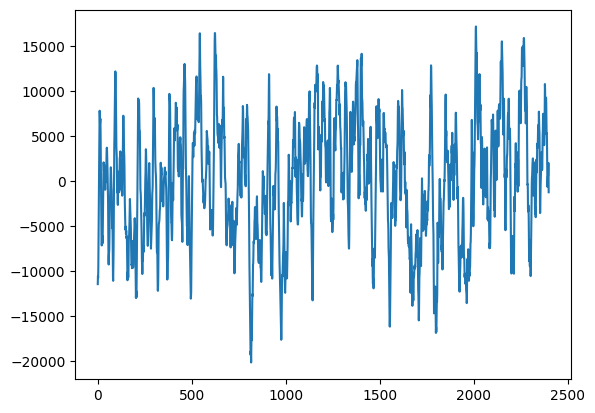

<Figure size 21600x1080 with 0 Axes>

In [1]:
import numpy as np
import scipy.io.wavfile as wav
import processing as ps


original_sample_rate, data  = wav.read("C:/Users/felix/Music/lavenders.wav")
mono = ps.stereo_to_mono(data)

frame_step = int(original_sample_rate / 50) # 50 Frames pro Sekunde
frame_length = int(frame_step * 2.5)

frames = ps.samples_to_frames(
    data=mono,
    frame_length=frame_length,
    frane_step=frame_step
)

int_frame = frames[803]

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.plot(int_frame)
figure(figsize=(20, 1), dpi=1080)

print(mono.dtype)


# Darstellung als Fließkommazahl

float64
Max:  0.999969482421875


<Figure size 21600x1080 with 0 Axes>

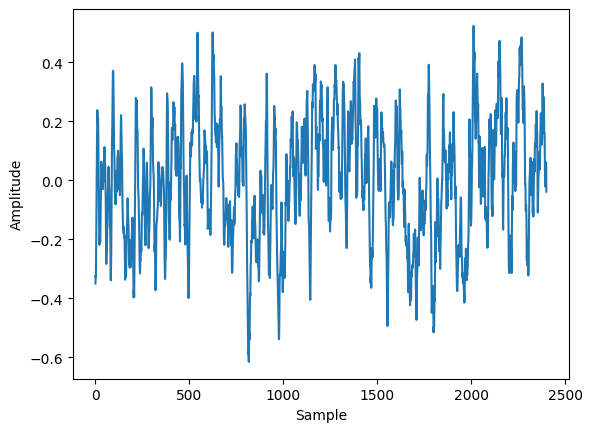

<Figure size 21600x1080 with 0 Axes>

In [2]:
float_frame = int_frame / 2 ** 15
float_data = mono / 2 ** 15

print(float_frame.dtype)
plt.plot(float_frame)
plt.xlabel("Sample")
plt.ylabel("Amplitude")

print("Max: ", max(float_data))
figure(figsize=(20, 1), dpi=1080)

Text(0, 0.5, 'FFT')

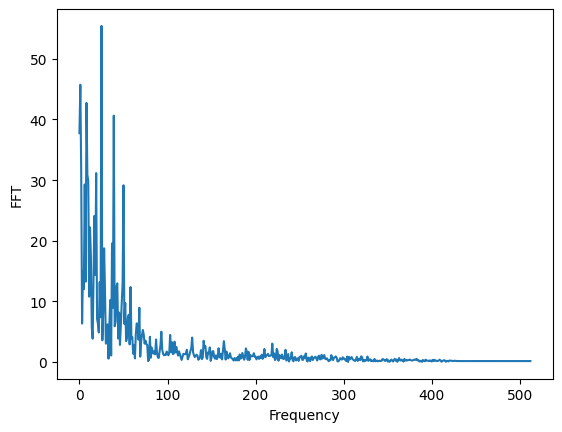

In [3]:
fft = np.absolute(np.fft.rfft(float_frame, n=1024))

plt.plot(fft)
plt.xlabel("Frequency")
plt.ylabel("FFT")


# Pre-Emphasis Filter auf das Signal

Tiefe Frequenzen weißen eine viel höhere Signalenergie als hohe Frequenzen auf.

Dies hat (bei der Visualsierung) zur Folge, dass später nach der Fourier Transformation, keine großen Unterschiede bei den höheren Frequenzen mehr wargenommen werden können, da die tiefen Frequenzen dominieren.

Mit einem kleinen Tiefpassfilter kann das Signal normalisiert werden.


<Figure size 21600x1080 with 0 Axes>

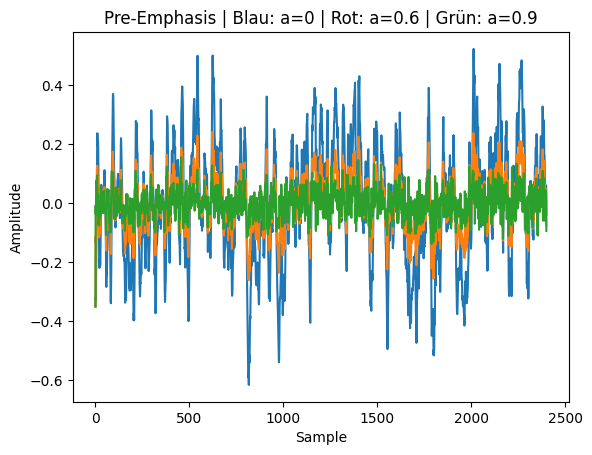

<Figure size 21600x1080 with 0 Axes>

In [4]:

x = float_frame
new_signal = np.append(x[0], x[1:] - 0.6 * x[:-1])
new_signal2 = np.append(x[0], x[1:] - 0.9 * x[:-1])


plt.plot(float_frame)
plt.plot(new_signal)
plt.plot(new_signal2)
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.title("Pre-Emphasis | Blau: a=0 | Rot: a=0.6 | Grün: a=0.9")
figure(figsize=(20, 1), dpi=1080)

Text(0.5, 1.0, 'Pre-Emphasis mit a=0.9')

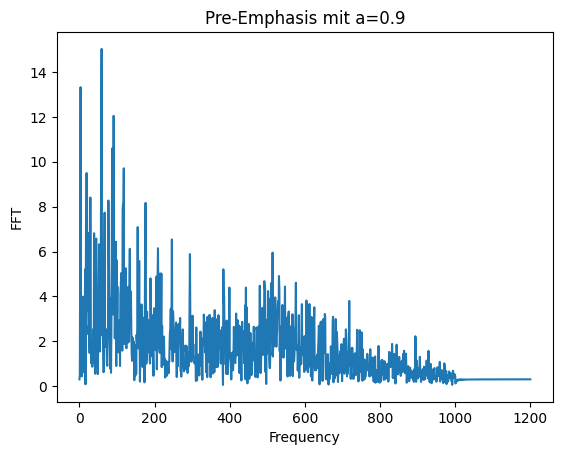

In [5]:
plt.plot(np.abs(np.fft.rfft(new_signal2)))
plt.xlabel("Frequency")
plt.ylabel("FFT")
plt.title("Pre-Emphasis mit a=0.9")